# Exploratory Data Analysis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv("Combined_Data_For_Analysis.csv")
df.shape

(60256, 10)

In [41]:
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,29-Dec-17
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,28-Dec-17
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,27-Dec-17
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,22-Dec-17
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,21-Dec-17


In [42]:
print(df.describe(include=[object]))

         state_name district_name market_center_name Variety  group_name  \
count         60256         60256              60256   60256       60256   
unique            1             1                 20       4           1   
top     Maharashtra        Nashik         Pimpalgaon   Other  Vegetables   
freq          60256         60256               5112   40621       60256   

       date_arrival  
count         60256  
unique         1518  
top       16-Dec-21  
freq            102  


In [43]:
##Finding Categorical Features in Dataset 
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['state_name', 'district_name', 'market_center_name', 'Variety', 'group_name', 'date_arrival']


In [44]:
##Numerical Features in Dataset
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 4
Numerical Features:  ['Arrival', 'MIN', 'MAX', 'MODAL']


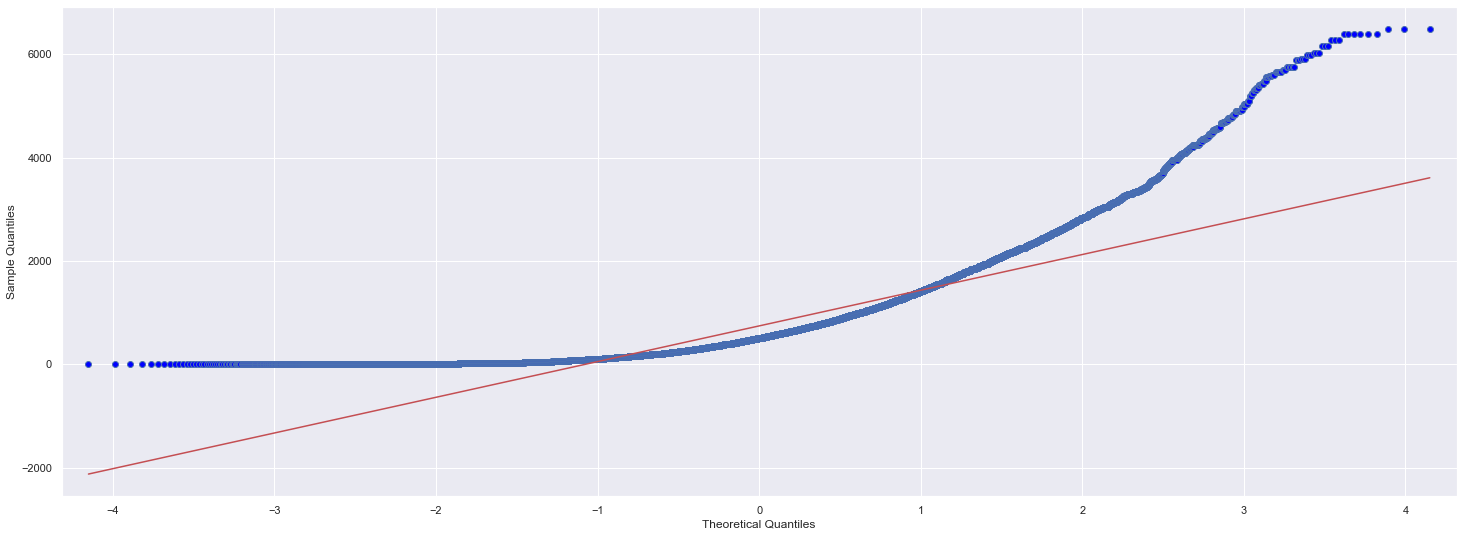

In [45]:
import statsmodels.api as smi
import pylab
smi.qqplot(df['Arrival'],line= 'r')
pylab.show()

<AxesSubplot:ylabel='Frequency'>

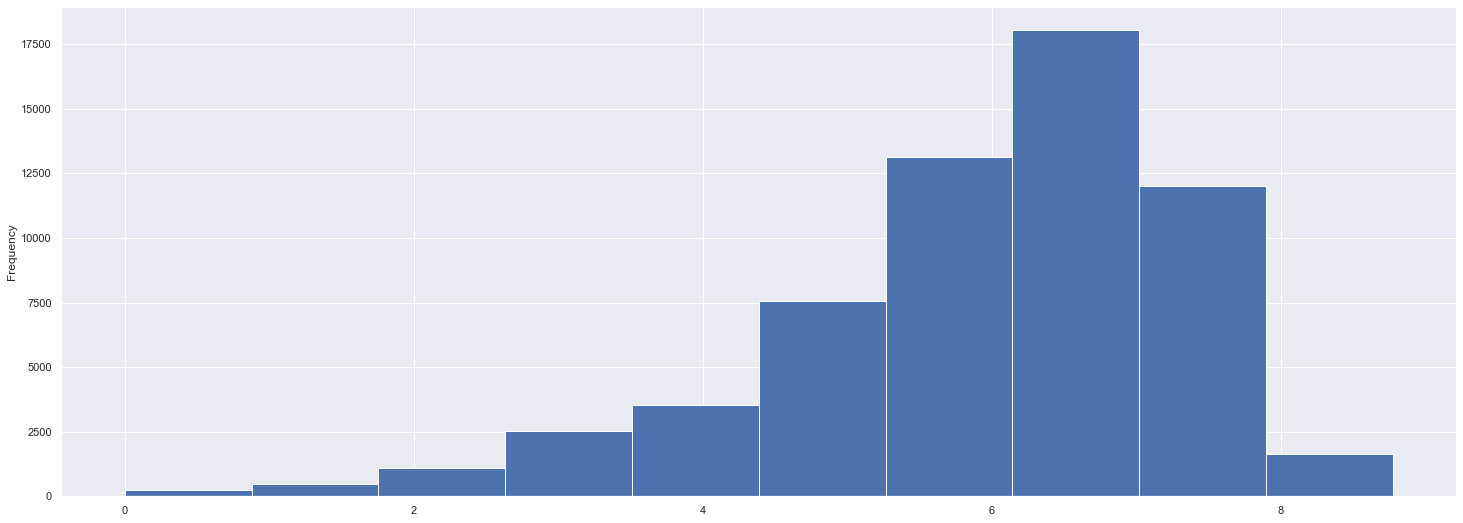

In [46]:
np.log(df.Arrival).plot(kind='hist')

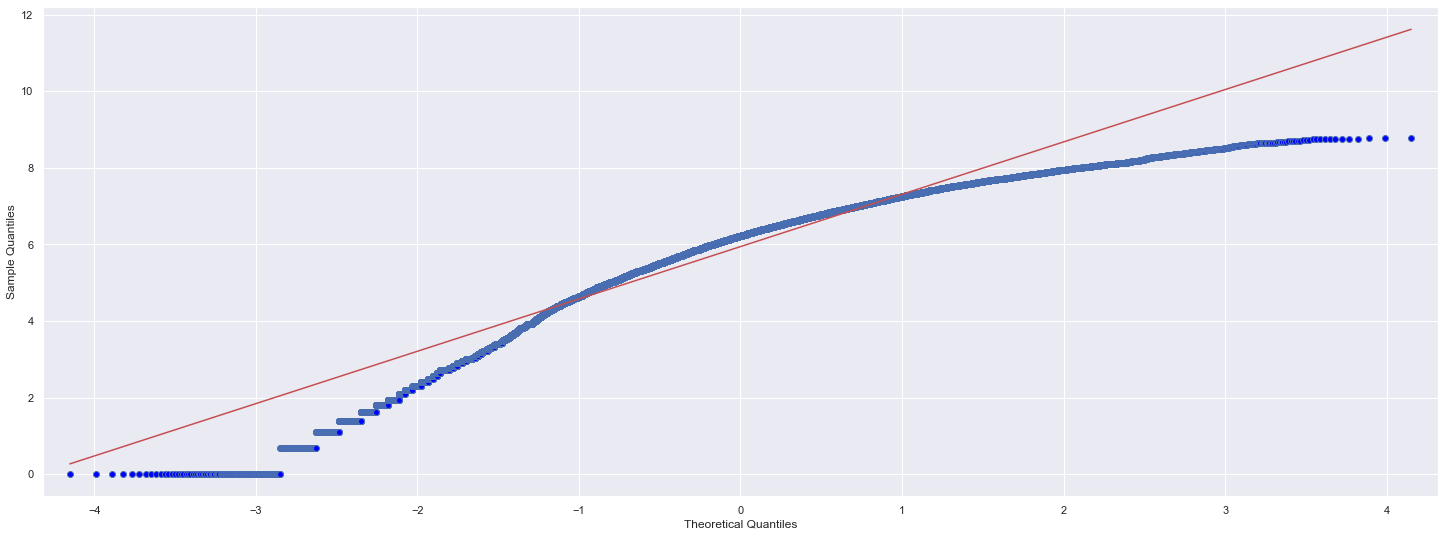

In [47]:
smi.qqplot(np.log(df.Arrival),line= 'r')
pylab.show()

<AxesSubplot:ylabel='Frequency'>

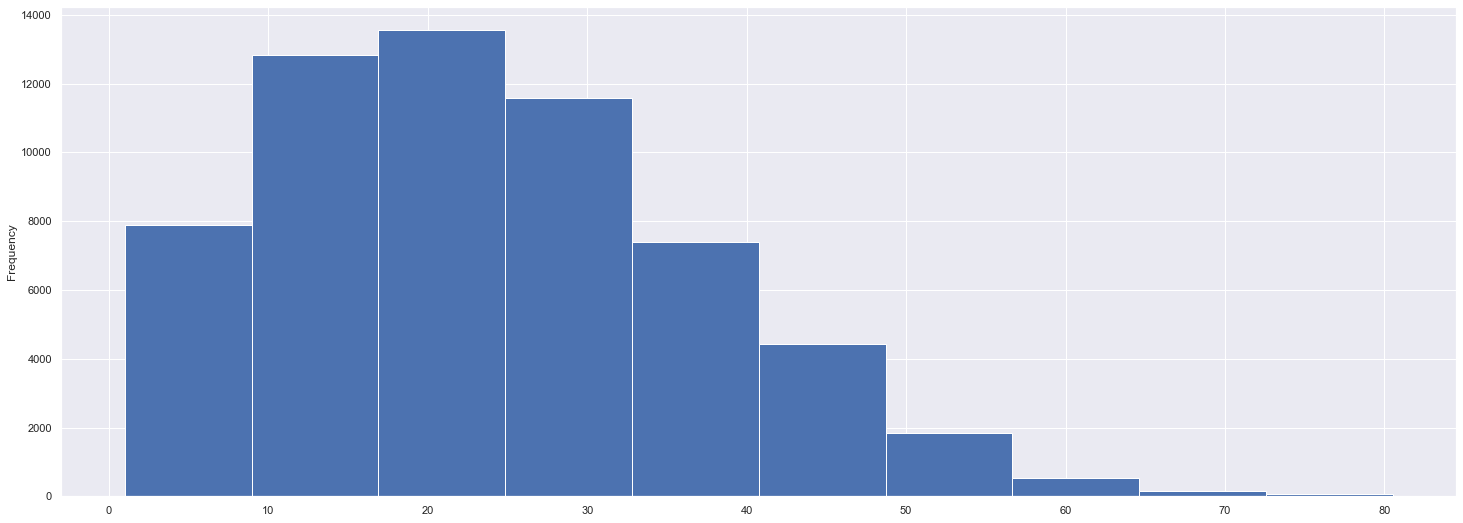

In [48]:
np.sqrt(df.Arrival).plot(kind='hist')

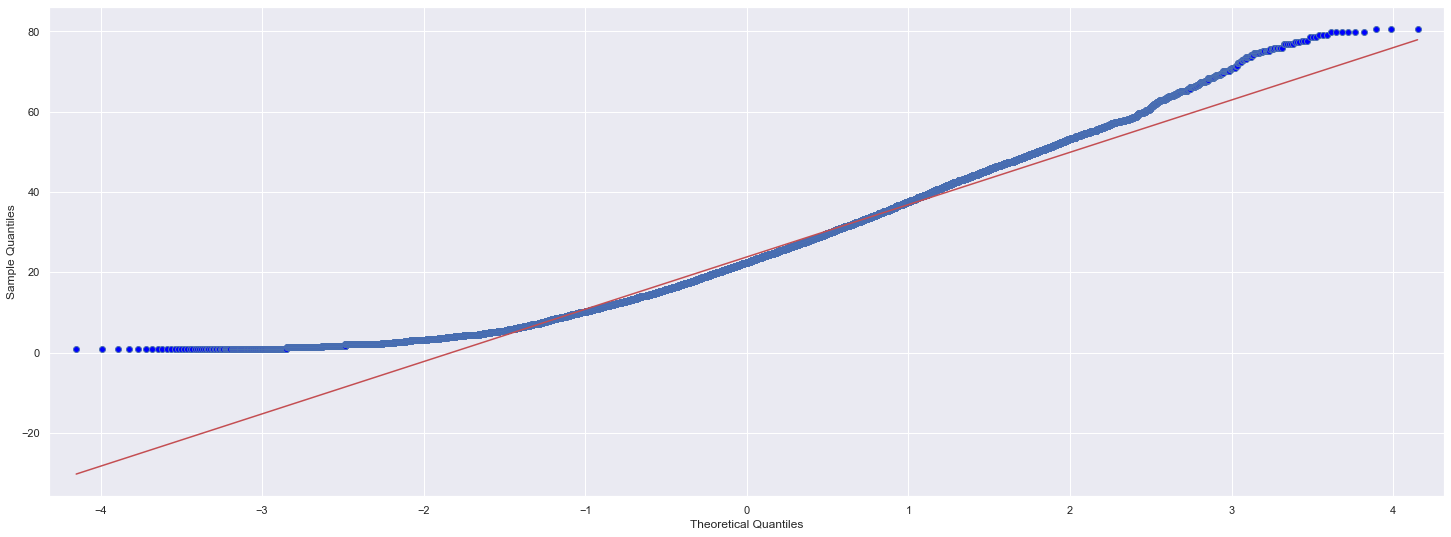

In [49]:
smi.qqplot(np.sqrt(df.Arrival),line= 'r')
pylab.show()

<AxesSubplot:ylabel='Frequency'>

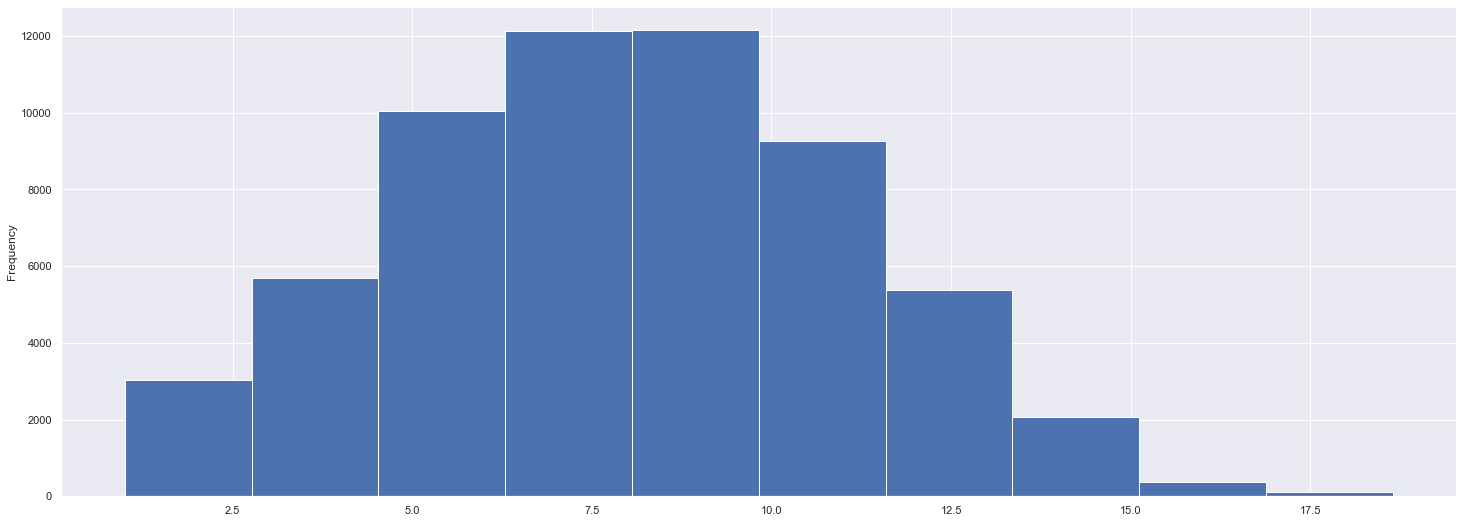

In [50]:
np.cbrt(df.Arrival).plot(kind='hist')

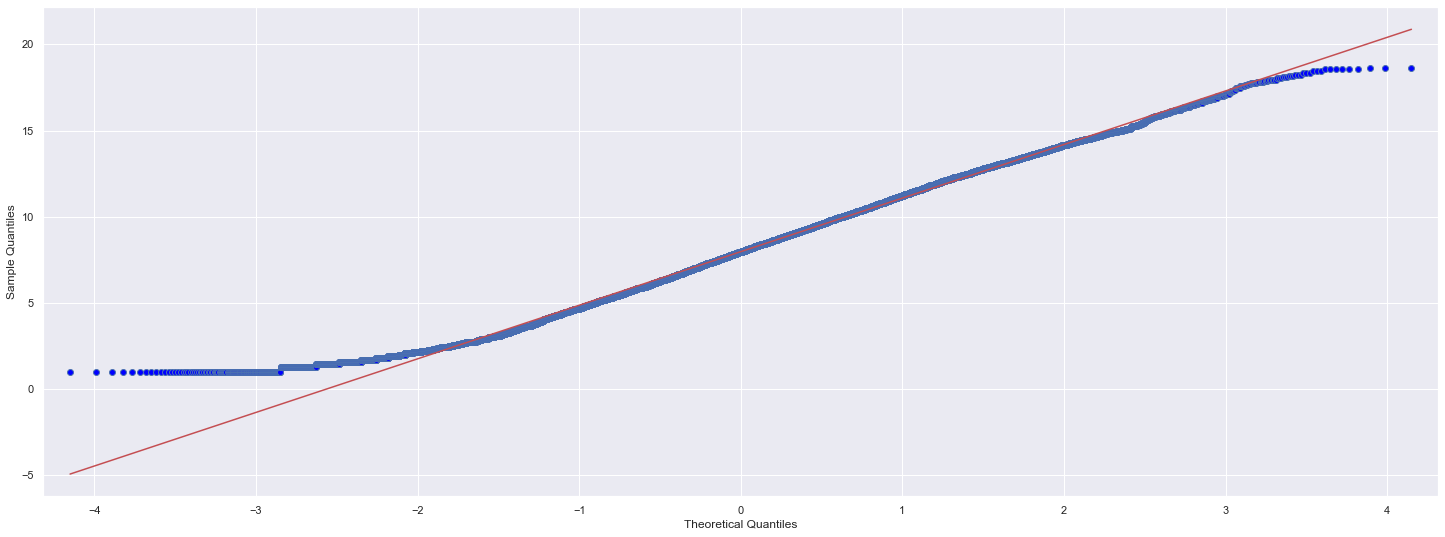

In [51]:
smi.qqplot(np.cbrt(df.Arrival),line= 'r')
pylab.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


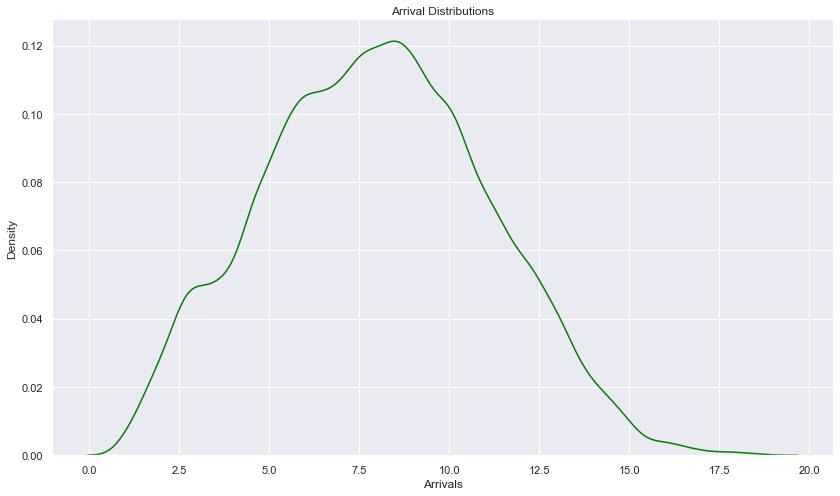

In [52]:
# Min, Max & Modal Price Distribution
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
sns.distplot(a=np.cbrt(df.Arrival), bins=80, color='green', hist=False, label='Arrivals')
plt.title('Arrival Distributions')
plt.xlabel('Arrivals')
sns.despine()

In [53]:
#Feature Engineering of Date column to decrease high cardinality:
df['date_arrival'] = pd.to_datetime(df['date_arrival'])
df['year'] = df['date_arrival'].dt.year
df['month'] = df['date_arrival'].dt.month
df['day'] = df['date_arrival'].dt.day

In [54]:
#Drop Date column:
df.drop('date_arrival', axis = 1, inplace = True)
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,year,month,day
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017,12,29
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017,12,28
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017,12,27
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017,12,22
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,1588,1400,2850,2670,2017,12,21


In [55]:
df.corr()

,Arrival,MIN,MAX,MODAL,year,month,day
Arrival,1.000000,-0.201531,-0.173771,-0.186940,0.009619,-0.207314,-0.001652
MIN,-0.201531,1.000000,0.718078,0.762474,0.126152,0.264694,-0.006584
MAX,-0.173771,0.718078,1.000000,0.971724,0.209274,0.406432,-0.009995
MODAL,-0.186940,0.762474,0.971724,1.000000,0.201175,0.389847,-0.005989
year,0.009619,0.126152,0.209274,0.201175,1.000000,0.010890,0.001812
month,-0.207314,0.264694,0.406432,0.389847,0.010890,1.000000,0.048886
day,-0.001652,-0.006584,-0.009995,-0.005989,0.001812,0.048886,1.000000


<AxesSubplot:>

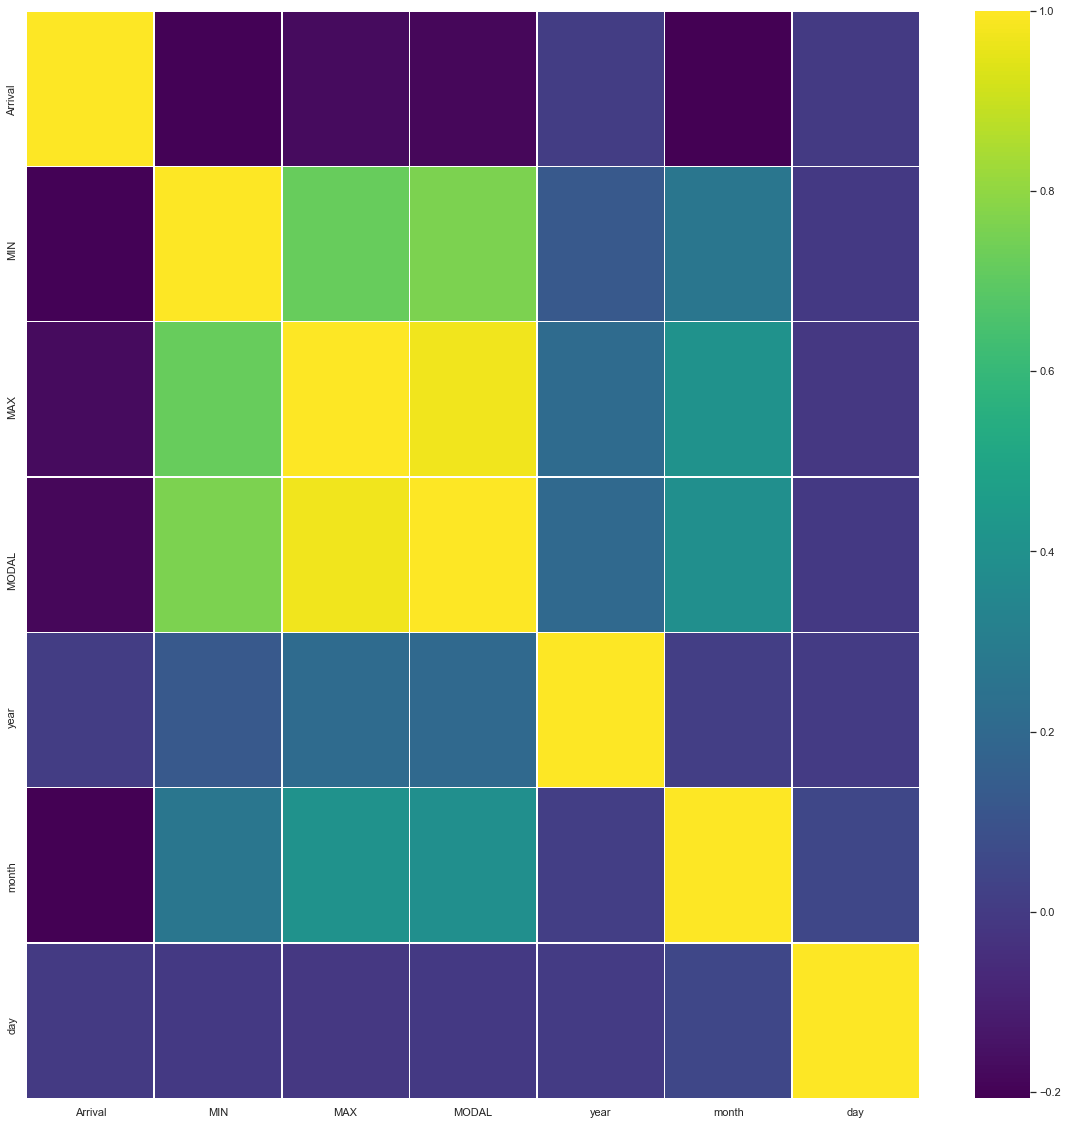

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

Arrival of Onion EDA

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival', ylabel='market_center_name'>

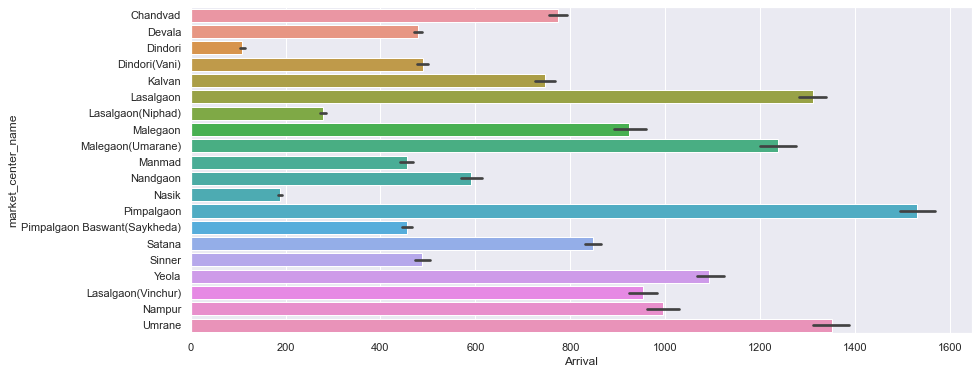

In [57]:
plt.figure(figsize=(14, 6))
sns.barplot(df['Arrival'],df['market_center_name'])

In [58]:
df_Pivot = pd.pivot_table(df, values = "Arrival", columns = "year", index = "month")
df_Pivot

year,2017,2018,2019,2020,2021
month,,,,,
1,1627.600000,874.468944,454.843537,707.669643,707.266137
2,1783.343629,728.731481,1046.109929,915.784983,425.434402
3,556.851852,429.075521,443.211921,743.902516,1136.836406
4,882.712062,731.660156,916.663265,560.111111,1448.607407
5,1226.515050,975.151703,879.708333,784.097826,1233.344595
6,1011.322581,752.444444,728.224832,829.127226,1038.809769
7,939.847561,827.977199,705.638484,1114.747368,867.639594
8,971.557621,888.788194,859.769231,898.834891,811.055866
9,881.921569,795.785441,674.069106,767.104859,819.711911


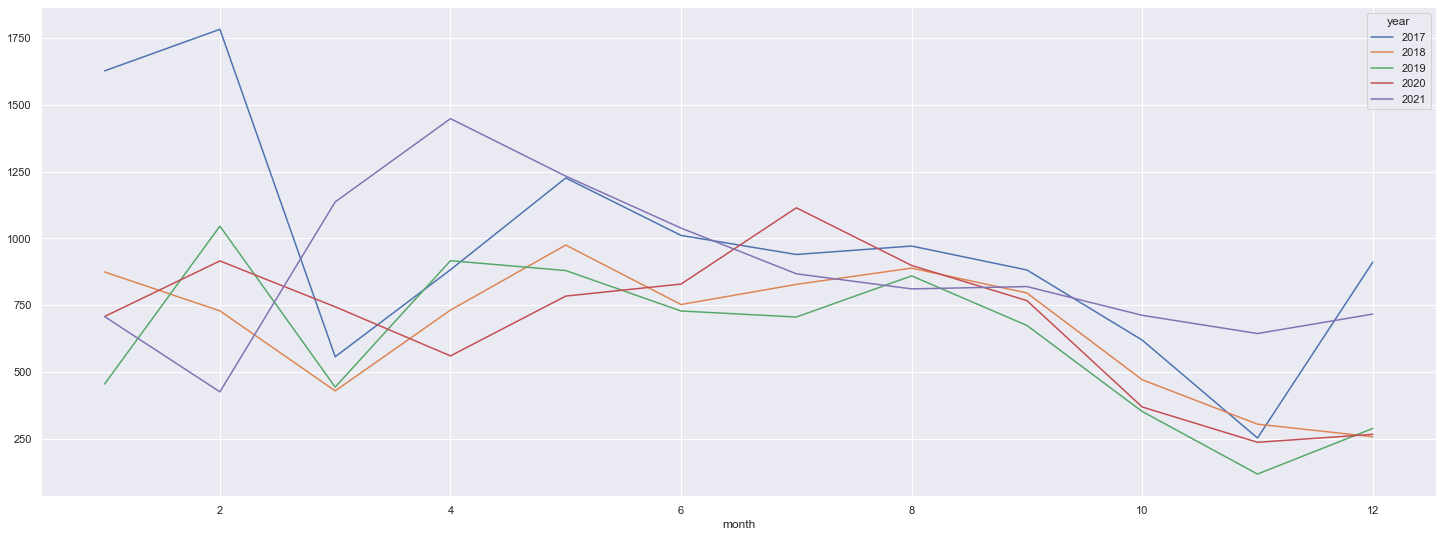

In [59]:
df_Pivot.plot()
plt.show()

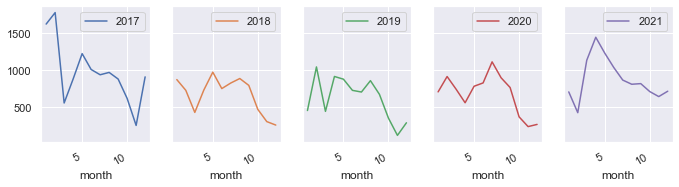

In [60]:
df_Pivot.plot(subplots = True, figsize=(16, 16), layout=(5, 7), sharey=True)
plt.show()

<AxesSubplot:xlabel='market_center_name', ylabel='Arrival'>

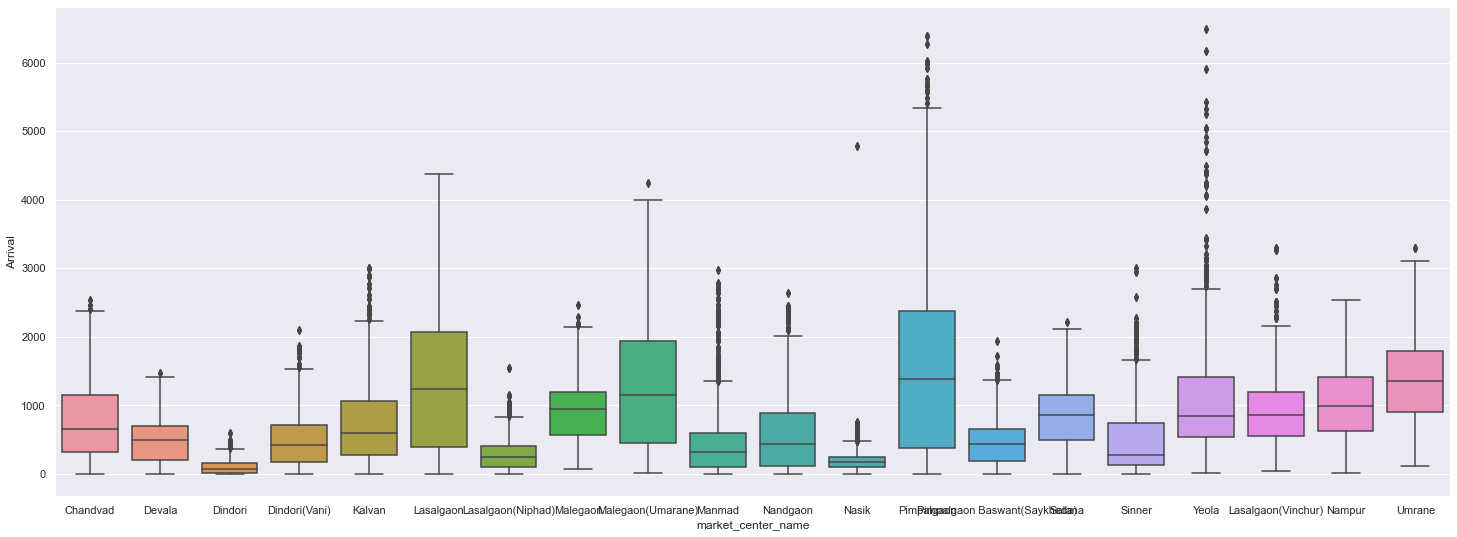

In [61]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,9)})
sns.boxplot(x = 'market_center_name', y = 'Arrival',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MODAL', ylabel='market_center_name'>

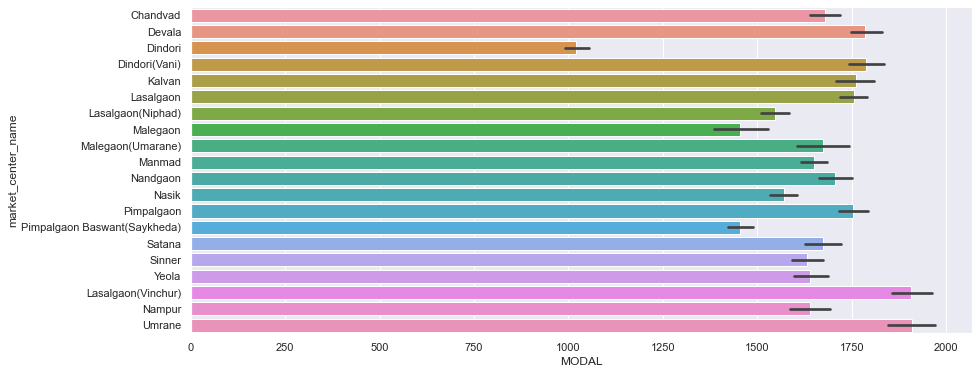

In [62]:
plt.figure(figsize=(14, 6))
sns.barplot(df['MODAL'],df['market_center_name'])

In [63]:
df_Pivot = pd.pivot_table(df, values = "MODAL", columns = "year", index = "month")
df_Pivot

year,2017,2018,2019,2020,2021
month,,,,,
1,577.522807,2746.437888,396.061224,3144.437500,2370.930487
2,469.698842,1501.879630,365.187943,1772.549488,3188.370262
3,526.812169,795.130208,596.470199,1424.783019,1393.813364
4,497.062257,627.546875,746.755102,918.347222,914.501235
5,387.806020,627.191950,870.772727,638.956522,1203.182432
6,498.930876,888.895238,1127.835570,768.272265,1755.763496
7,709.807927,1086.664495,1194.390671,675.676316,1641.461929
8,1895.293680,928.059028,1786.311355,1053.856698,1569.167598
9,1412.752941,737.789272,3103.666667,2614.017903,1652.518006


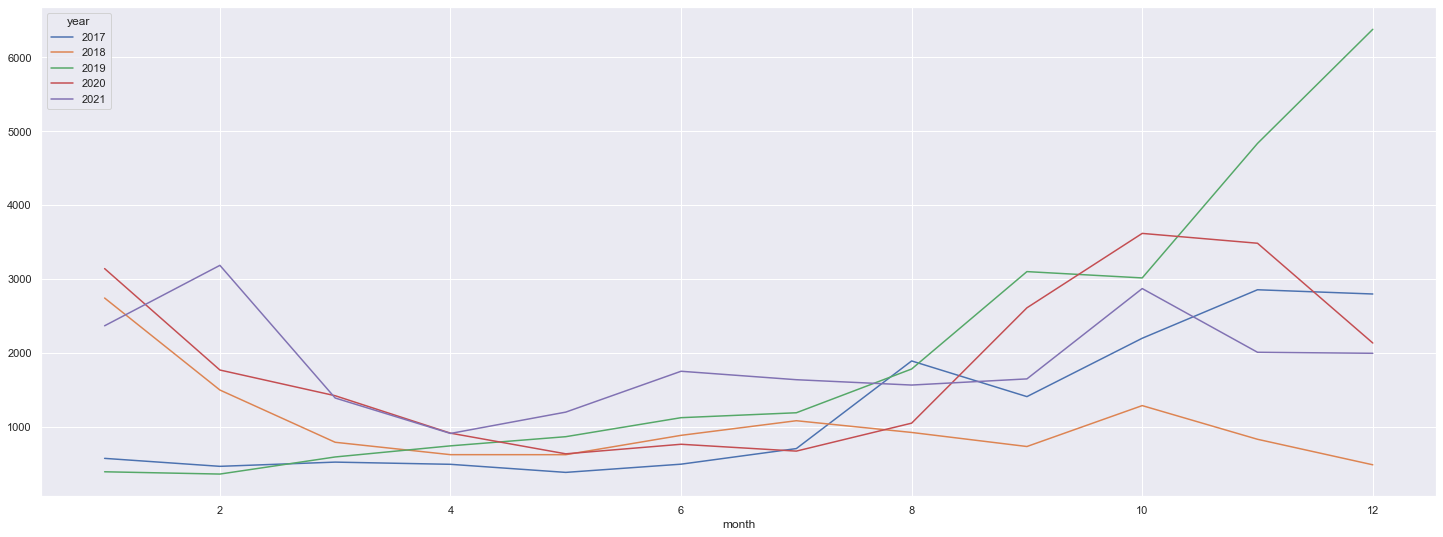

In [64]:
df_Pivot.plot()
plt.show()

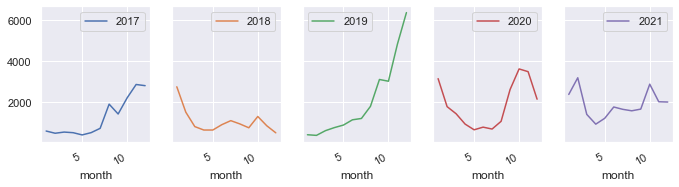

In [65]:
df_Pivot.plot(subplots = True, figsize=(16, 16), layout=(5, 7), sharey=True)
plt.show()

<AxesSubplot:xlabel='market_center_name', ylabel='MODAL'>

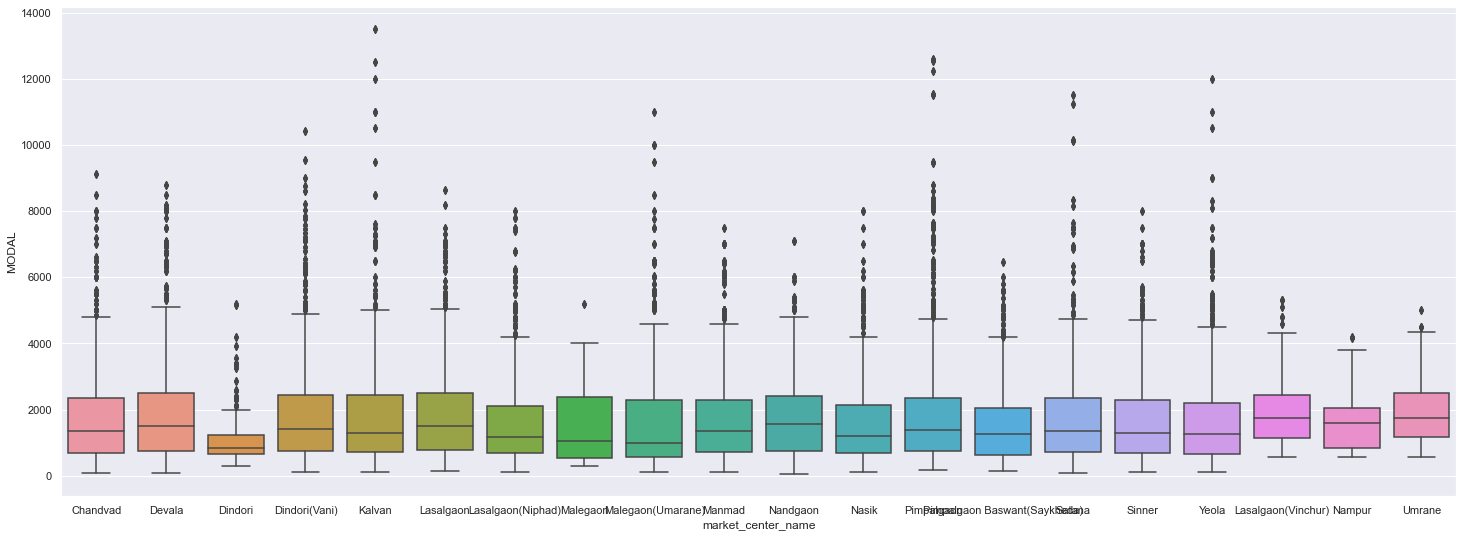

In [66]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,9)})
sns.boxplot(x = 'market_center_name', y = 'MODAL',data=df)